## To Predict Mileage per gallon performances of various cars


## Libraries
 Importing numpy, pandas, matplotlib, and seaborn libraries. And then setting %matplotlib inline 


>NumPy is a Linear Algebra Library for Python.Almost all of the libraries in the PyData Ecosystem rely on NumPy.
Numpy is also incredibly fast,as it has bindings to C libraries

>Pandas is an open source library.It is used for fast Analysis,Data Cleaning and Preparation.Using it we can work with wide variety of data

>Matplotlib is a python 2D and 3D plotting library which produces publication quality figures in a variety of hardcopy formats and interactive environments across platforms

>Seaborn is a statistical plotting library with beautiful default styles.it is designed to work with pandas data frame

>%matplotlib inline is used to see plots in the jupyter notebook


In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Reading Data

Reading the auto-mpg csv file as a DataFrame called df.

In [10]:
df=pd.read_csv('auto-mpg.csv')

In [11]:
df.head(6)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
5,15.0,8,429.0,198,4341,10.0,70,1,ford galaxie 500


** The data is technical specifications of cars and it is downloaded from UCI Machine Learning Repository.

>My aim is to develop a model using Machine Learning Algorithm to Analyze Mileage per gallon performances of various cars

>Data has 3 Multivalued discrete Attributes i.e cylinders, model_year & origin , 5 Continuous Attributes i.e mpg, displacement, horsepower, weight & acceleration and a String Attribute as car name


Some samples of auto-mpg data contain missing values represented by '?' into their Attribute horsepower Column . updating those samples and replacing '?' by na values. And again Reading the auto-mpg csv file as a DataFrame called df1.

In [12]:
df1=pd.read_csv('auto-mpg.csv',na_values='?')

>Pandas describe() is used to view some basic statistical details like percentile, mean, std etc. of a data frame or a series of numeric values.

In [13]:
df1.describe() 

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


** Pandas dataframe.info() function is used to get a concise summary of the dataframe

In [14]:
df1.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
mpg             398 non-null float64
cylinders       398 non-null int64
displacement    398 non-null float64
horsepower      392 non-null float64
weight          398 non-null int64
acceleration    398 non-null float64
model_year      398 non-null int64
origin          398 non-null int64
name            398 non-null object
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB


** From info() we come to know that total entries in the data frame is 398 . Here the attribute 'horsepower' has only 392 non null 
entries thus remaining entries are 'missing' . Also the attribute name is of type object and rest of the attributes contain 
numeric values

## Exploratory Data Analysis

Using seaborn to create a Scatter Plot to get the information about the values of the Attribute 'horsepower'. 

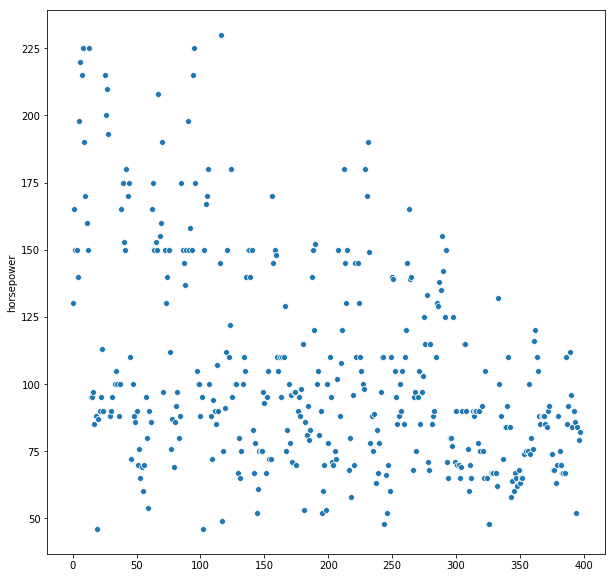

In [15]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=df1.index,y=df1.horsepower)

**we are using median to replace na values because scatter plot above shows that data contains outliers and in this case median is a better measure of central tendency

Since the column 'horsepower' contain missing values .So, we need to replace those missing values by the median of the remaining values of that column

In [16]:
median=df1.horsepower.median()

In [17]:
median

93.5

In [18]:
df1.horsepower.fillna(median,inplace=True)

In [19]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
mpg             398 non-null float64
cylinders       398 non-null int64
displacement    398 non-null float64
horsepower      398 non-null float64
weight          398 non-null int64
acceleration    398 non-null float64
model_year      398 non-null int64
origin          398 non-null int64
name            398 non-null object
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB


Attribute 'name' contain non numeric data values. thus, It is not relevant for 'Data Modeling' but it is relevant for 'Data Analysis' .So, we should remove it from the data frame and create a new data frame . 

In [20]:
df2=df1.drop('name',axis=1)

After Data Cleaning step, checking Data frame . Since it doesn't contain any missing value and non numeric attribute.
thus,data frame is in proper format

In [21]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
mpg             398 non-null float64
cylinders       398 non-null int64
displacement    398 non-null float64
horsepower      398 non-null float64
weight          398 non-null int64
acceleration    398 non-null float64
model_year      398 non-null int64
origin          398 non-null int64
dtypes: float64(4), int64(4)
memory usage: 25.0 KB


Heatmap is used to show the behaviour of the Attributes in the data 

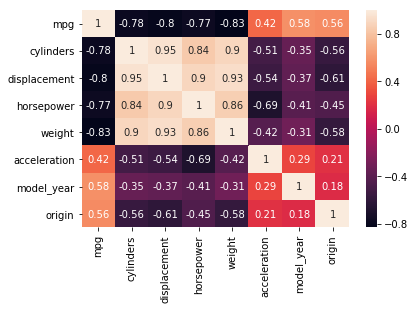

In [22]:
sns.heatmap(data=df2.corr(),annot=True)

**From above correlation matrix,We can vizualize that there are strong correlations between the attributes mpg & displacement,
mpg & weight,cylinders & displacement,cylinders & horsepower,cylinders & weight,displacement & horsepower,displacement & weight
and horsepower & weight 

In [23]:
df2.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,1
1,15.0,8,350.0,165.0,3693,11.5,70,1
2,18.0,8,318.0,150.0,3436,11.0,70,1
3,16.0,8,304.0,150.0,3433,12.0,70,1
4,17.0,8,302.0,140.0,3449,10.5,70,1


From the Heatmap we can vizualize that there exists 'multi-collinearity' among the Attributes of the data

We'll need to convert categorical features to dummy variables , Otherwise our machine learning algorithm won't be able to directly take in those features as inputs. Column 'model_year' and 'origin' are of categorical type. So,we will add Dummy variables for these attributes

>pd.get_dummies() :function which can turn a categorical variable into a series of zeros and ones,which makes them a lot
easier to quantify and compare
>>drop_first=True : Since one of the columns can be generated completely from the others, and hence retaining this extra 
column does not add any new information for the modelling process, it will be good practice to always drop the first column 

>pd.concat() :function which can perform concatenation operations along an axis

>dataframe.drop() :Pandas drop function allows us to drop/remove one or more columns from a dataframe.
>>inplace=True :this operation changes directly the content of a given data without making a copy.

>dataframe.column_name.unique() :function returns unique values in the column

In [24]:
modelyear=pd.get_dummies(df2['model_year'],drop_first=True)

In [25]:
origin1=pd.get_dummies(df2['origin'],drop_first=True)

In [26]:
df3=pd.concat([df2,modelyear,origin1],axis=1)

In [27]:
len(list(df3.model_year.unique()))

13

In [28]:
len(list(df3.origin.unique()))

3

In [29]:
df3.drop(['origin','model_year'],axis=1,inplace=True)

In [30]:
df3.columns

Index([         'mpg',    'cylinders', 'displacement',   'horsepower',
             'weight', 'acceleration',             71,             72,
                   73,             74,             75,             76,
                   77,             78,             79,             80,
                   81,             82,              2,              3],
      dtype='object')

StandardScaler performs the task of Standardization. Usually a dataset contains variables that are different in scale.
>It will transform the data such that its distribution will have a mean value 0 and standard deviation of 1. Given the 
distribution of the data, each value in the dataset will have the sample mean value subtracted, and then divided by the
standard deviation of the whole dataset.

In [31]:
from sklearn.preprocessing import StandardScaler

In [32]:
sc=StandardScaler()

Transforming the data into standard scale

We can perform two steps fitting and transforming dataset in single step using "fit_transform " 
>fit method is applied to the dataset to learns the model parameters (for example, mean and standard deviation).
>transform method is apllied to the dataset to get the transformed (scaled) dataset.

In [33]:
sc.fit_transform(df3)

C:\Users\shiv\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\shiv\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


array([[-0.7064387 ,  1.49819126,  1.0906037 , ..., -0.29063493,
        -0.46196822, -0.49764335],
       [-1.09075062,  1.49819126,  1.5035143 , ..., -0.29063493,
        -0.46196822, -0.49764335],
       [-0.7064387 ,  1.49819126,  1.19623199, ..., -0.29063493,
        -0.46196822, -0.49764335],
       ...,
       [ 1.08701694, -0.85632057, -0.56103873, ...,  3.44074261,
        -0.46196822, -0.49764335],
       [ 0.57460104, -0.85632057, -0.70507731, ...,  3.44074261,
        -0.46196822, -0.49764335],
       [ 0.95891297, -0.85632057, -0.71467988, ...,  3.44074261,
        -0.46196822, -0.49764335]])

In [34]:
df3.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,71,72,73,74,75,76,77,78,79,80,81,82,2,3
0,18.0,8,307.0,130.0,3504,12.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,15.0,8,350.0,165.0,3693,11.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,18.0,8,318.0,150.0,3436,11.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,16.0,8,304.0,150.0,3433,12.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,17.0,8,302.0,140.0,3449,10.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Training and Testing Data


In [35]:
y=df3['mpg']

In [36]:
X=df3.drop(['mpg'],axis=1)

In [37]:
X=sc.fit_transform(X)


C:\Users\shiv\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\shiv\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [38]:
X

array([[ 1.49819126,  1.0906037 ,  0.67311762, ..., -0.29063493,
        -0.46196822, -0.49764335],
       [ 1.49819126,  1.5035143 ,  1.58995818, ..., -0.29063493,
        -0.46196822, -0.49764335],
       [ 1.49819126,  1.19623199,  1.19702651, ..., -0.29063493,
        -0.46196822, -0.49764335],
       ...,
       [-0.85632057, -0.56103873, -0.53187283, ...,  3.44074261,
        -0.46196822, -0.49764335],
       [-0.85632057, -0.70507731, -0.66285006, ...,  3.44074261,
        -0.46196822, -0.49764335],
       [-0.85632057, -0.71467988, -0.58426372, ...,  3.44074261,
        -0.46196822, -0.49764335]])

In [39]:
y=sc.fit_transform(np.array(y).reshape(-1,1))

## Train Test Split
Using model_selection.train_test_split from sklearn to split the data into training and testing sets.

In [40]:
from sklearn.model_selection import train_test_split

scikit-learn provides a helpful function for partitioning data, train_test_split ,which splits out our data into a training set
and a test set
>test_size : float, int or None, optional (default=None)
>>If float, should be between 0.0 and 1.0 and represent the proportion of the dataset to include in the test split.
>>If int, represents the absolute number of test samples. 
>>If None, the value is set to the complement of the train size. If train_size is also None, it will be set to 0.25.

>train_size : float, int, or None, (default=None)
>>If float, should be between 0.0 and 1.0 and represent the proportion of the dataset to include in the train split. 
>>If int, represents the absolute number of train samples. 
>>If None, the value is automatically set to the complement of the test size.

>random_state : int, RandomState instance or None, optional(default=None)
>>If int, random_state is the seed used by the random number generator
>>If RandomState instance, random_state is the random number generator
>>If None, the random number generator is the RandomState instance used by np.random.

>shuffle : boolean, optional (default=True)
>>Whether or not to shuffle the data before splitting. If shuffle=False then stratify must be None.

>stratify : array-like or None (default=None)
>>If not None, data is split in a stratified fashion, using this as the class labels.


In [41]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

## Training the Model

Ridge Regression is a remedial measure taken to alleviate multicollinearity amongst regression predictor variables in a model.
It adds a small bias factor to the variables in order to alleviate this problem

In [42]:
from sklearn.linear_model import Ridge

Creating an instance of a Ridge() model named as model

In [43]:
model=Ridge()

Fitting the training data set

In [44]:
model.fit(X_train,y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

## Predicting Test Data

In [45]:
predictions=model.predict(X_test)

## Evaluating Model

evaluate the model by checking its Accuracy

R-squared is a statistical measure of how close the data are to the fitted regression line. It is also known as the
coefficient of determination.Best possible score is 1.0, lower values are worse.

In [46]:
from sklearn.metrics import r2_score

In [47]:
r2_score(y_test,predictions)

0.8417934448295403

## Visualization

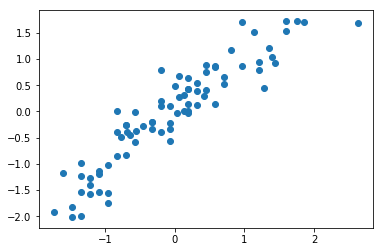

In [56]:
plt.scatter(y_test,predictions)

 An approximately linear model has been obtained!

## Conclusion
After Analyzing the auto-mpg data, we can conclude that the model that we have created using Ridge Regression is 84 % Accurate. 
That means it indicates that the model explains most of the variability of the response data around its mean.the fitted values would always equal the observed values and, therefore, most of the data points would fall on the fitted regression line.